### Data Description
- Clinical Features:
   - The data includes information about 180 patients, like their age, gender, blood pressure at rest, cholesterol levels, results from heart tests, whether they experience chest pain during exercise, and other important details. 
   - These details help us understand the patients' overall health and the condition of their heart.

- Target Variable: 
   - Each patient's information includes a yes (1) or no (0) answer about whether they have heart disease. 
   - This information is used to create computer programs that try to guess the chance of having heart disease based on the other details given about the patients.

### Business Case: Early Detection and Management of Cardiovascular Disease using Machine Learning



Problem Statement:
- Cardiovascular diseases (CVDs) cause a significant number of annual deaths globally, affecting even individuals under 70 years of age.
- Early detection and intervention are crucial for reducing premature mortality and improving patient outcomes.

Objective:
- Build a machine learning model that predicts cardiovascular disease risk using 11 relevant features.
- Create a tool for healthcare practitioners to identify high-risk patients and enable timely interventions.

Dataset:
- Utilize a dataset with 11 features associated with cardiovascular risk, including medical history, diagnostic results, lifestyle factors, and demographics.

Solution:
- Develop a predictive machine learning model that uses patient data to generate cardiovascular disease risk scores.
- Analyze feature relationships and historical cases to make accurate predictions.

Business Impact:
- Reduce premature deaths through early detection and timely interventions.
- Enhance patient care with personalized plans based on risk profiles.
- Optimize medical resources by focusing on high-risk patients.
- Generate cost savings by minimizing severe treatments and hospitalizations.

Ethical Considerations:
- Ensure patient data privacy and comply with regulations like HIPAA.
- Implement strong security measures to protect sensitive health information.

Implementation:
- Create a user-friendly interface for healthcare professionals to input data and receive risk assessments.
- Integrate the model into existing hospital systems for seamless use.


### Domain Analysis


slope_of_peak_exercise_st_segment: 
- This feature represents the slope of the peak exercise ST segment. It's an electrocardiography readout that indicates the quality of blood flow to the heart during peak exercise.

thal:
- The thallium stress test results, a categorical variable, measure blood flow to the heart. It can take on one of three possible values: "normal," "fixed_defect," or "reversible_defect."
- In this context, it's important to note that 'fixed defect' is considered more serious than 'reversible defect,' and 'reversible defect' is more concerning than 'normal.' Therefore, the label encoding should reflect this order of increasing danger.

resting_blood_pressure: 
- This feature indicates the resting blood pressure of the patients. It's measured in mm Hg and provides insights into the patient's cardiovascular health.

chest_pain_type: 
- The type of chest pain experienced by the patients is categorized into four values. This could help in understanding the nature and severity of chest pain symptoms.

num_major_vessels: 
- The number of major blood vessels colored by fluoroscopy is an indication of potential blockages or abnormalities in the patient's circulatory system.

fasting_blood_sugar_gt_120_mg_per_dl:
- This binary feature indicates whether the fasting blood sugar level of the patient is greater than 120 mg/dl. Elevated fasting blood sugar levels can be an indicator of diabetes or insulin resistance.

resting_ekg_results: 
- This categorical feature provides the results of the resting electrocardiographic test. The values 0, 1, and 2 may correspond to different EKG patterns and could help in assessing the patient's heart health.

serum_cholesterol_mg_per_dl: 
- Serum cholesterol level in mg/dl gives insight into the patient's cholesterol profile, which is a crucial risk factor for cardiovascular diseases.

oldpeak_eq_st_depression: 
- This numerical feature represents the ST depression induced by exercise relative to rest. It's a measure of abnormality in electrocardiograms and can provide information about the heart's response to exercise.

sex: 
- This binary feature represents the gender of the patient. It's an important demographic factor that could impact heart health.

age: 
- Age of the patient in years. 
- Age is a significant factor in assessing the risk of heart diseases, as certain conditions become more prevalent with increasing age.

max_heart_rate_achieved: 
- This feature indicates the maximum heart rate achieved by the patient during exercise, measured in beats per minute. It reflects the cardiovascular fitness of the patient.

exercise_induced_angina: 
- A binary feature indicating whether the patient experienced exercise-induced chest pain. This can provide insights into the patient's cardiovascular response to physical stress.

heart_disease_present: 
- The target variable indicates whether the patient has heart disease (binary: 0 for no, 1 for yes). This is the variable you're trying to predict, making it the central focus of your analysis.


In [1474]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [1475]:
y=pd.read_csv('labels.csv')
x=pd.read_csv('values.csv')
heart=pd.concat((x,y),axis=1)
heart.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,patient_id,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0z64un,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,ryoo3j,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,yt1s1x,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,l2xjde,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,oyt4ek,0


### Dropping unwanted and duplicated features

In [1476]:
heart.columns.duplicated().sum()

1

In [1477]:
heart.columns[heart.columns.duplicated()]

Index(['patient_id'], dtype='object')

In [1478]:
heart.drop(columns='patient_id',inplace=True)

In [1479]:
heart.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [1480]:
heart.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   slope_of_peak_exercise_st_segment     180 non-null    int64  
 1   thal                                  180 non-null    object 
 2   resting_blood_pressure                180 non-null    int64  
 3   chest_pain_type                       180 non-null    int64  
 4   num_major_vessels                     180 non-null    int64  
 5   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 6   resting_ekg_results                   180 non-null    int64  
 7   serum_cholesterol_mg_per_dl           180 non-null    int64  
 8   oldpeak_eq_st_depression              180 non-null    float64
 9   sex                                   180 non-null    int64  
 10  age                                   180 non-null    int64  
 11  max_heart_rate_achi

- no null values
- thal feature has dtype as object
- oldpeak_eq_st_depression is float and others are integers

In [1481]:
heart.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


### Exploratory Data Analysis


### 1.UNIVARIATE ANALYSIS

In [1482]:
import sweetviz as sv
u=sv.analyze(heart)

                                             |                                             | [  0%]   00:00 ->…

In [1483]:
u.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [1484]:
heart.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


#### OBSEVATION:
1.slope_of_peak_exercise_st_segment:
- The peak exercise slope exhibits three distinct patterns: upsloping (1), flat (2), and downsloping (3). 
- Among the patients, 52% display an upsloping pattern, 42% show a flat pattern, and the remaining 7% exhibit a downsloping pattern in the peak exercise ST segment slope.
- slope_of_peak_exercise and oldpeak_eq_st_depression has 0.62 correlation ratio.

2.THAL:
- Among the 180 patients, there are three distinct categories in the "thal" variable: "normal," "reversible defect," and "fixed defect." 
- Out of these patients, 54% individuals have been diagnosed with the "normal" blood disorder, 
- 41% individuals exhibit a "reversible defect" blood disorder, 
- and the remaining 4% patients show a "fixed defect" blood disorder.

3.RESTING BLOOD PRESSURE:
- The dataset displays a range of resting blood pressure values spanning from 94 to 180, with an average of approximately 131.3. - The majority of patients exhibit a resting blood pressure of around 130.

4.CHEST PAIN TYPE:
- There are four categories of chest pain: typical angina (TA), atypical angina (ATA), non-anginal pain (NAP), and asymptomatic (ASY). 
- The highest percentage of patients (46%) experience asymptomatic chest pain, followed by 32% with non-anginal pain. 
- The remaining patients have atypical angina (16%) and typical angina (7%) chest pain, respectively.

5.Number of MAJOR VESSELS:
- The number of major vessels ranges from 0 to 3. 
- The majority of cases (106) have no major vessels, while the remaining instances have a count of major vessels distributed among three values: 37, 23, and 14.

6.FASTING BLOOD SUGAR:
- There are two fasting blood sugar categories:
- True (1) indicates that 151 patients have fasting blood sugar levels less than 120 mg/dl.
- False (0) indicates that 29 patients have fasting blood sugar levels greater than 120 mg/dl.

7.RESTING EKG RESULT:
- Among the three unique values (0, 1, and 2) in the "resting electrocardiographic results" (resting EKG) feature, 
- the highest proportion (52%) of patients have an EKG result of 2,
- approximately 47% of patients exhibit a normal EKG result (0),
- less than 1%, fall under the EKG result category of 1.

8.SERUM CHOLESTEROL:
- The serum cholesterol levels span from 126 to 564 in the dataset. 
- The values 239 and 204 are the most commonly occurring serum cholesterol levels.

9.OLD PEAK ST DEPRESSION:
- The range of old peak st depression between 0 to 6.20

10.SEX == [0:Female, 1:male]
- Most (124) number of patient is male and 56 patient is female

11.AGE:
- The age range between 29 to 77 year
- The average age of patient is 54.8 year

12.MAX HEART RATE:
- The most obesrvation of heart rate between 140 to 180
- maximum heart rate is 202 and minimum heart rate is 96

13.EXERCISE INDUCED ANGINA: [0: no, 1: yes]
- 123 patient has no chest pain and reamining 57 patient chest pain

14.Heart_disease_present [0:No heart disease, 1:heart disease]
- 100 patient has no heart disease and 80 patient has heart disease

### 2.BIVARIATE ANALYSIS
### ANALYSIS ON CATEGORICAL VERIABLE WITH RESPECT TO TARGET VERIABLE(HEART DISEASE)

In [1485]:
categorical = []

for columns in x:
    if x[columns].nunique() <= 10:
        categorical.append(columns)


In [1486]:
categorical

['slope_of_peak_exercise_st_segment',
 'thal',
 'chest_pain_type',
 'num_major_vessels',
 'fasting_blood_sugar_gt_120_mg_per_dl',
 'resting_ekg_results',
 'sex',
 'exercise_induced_angina']

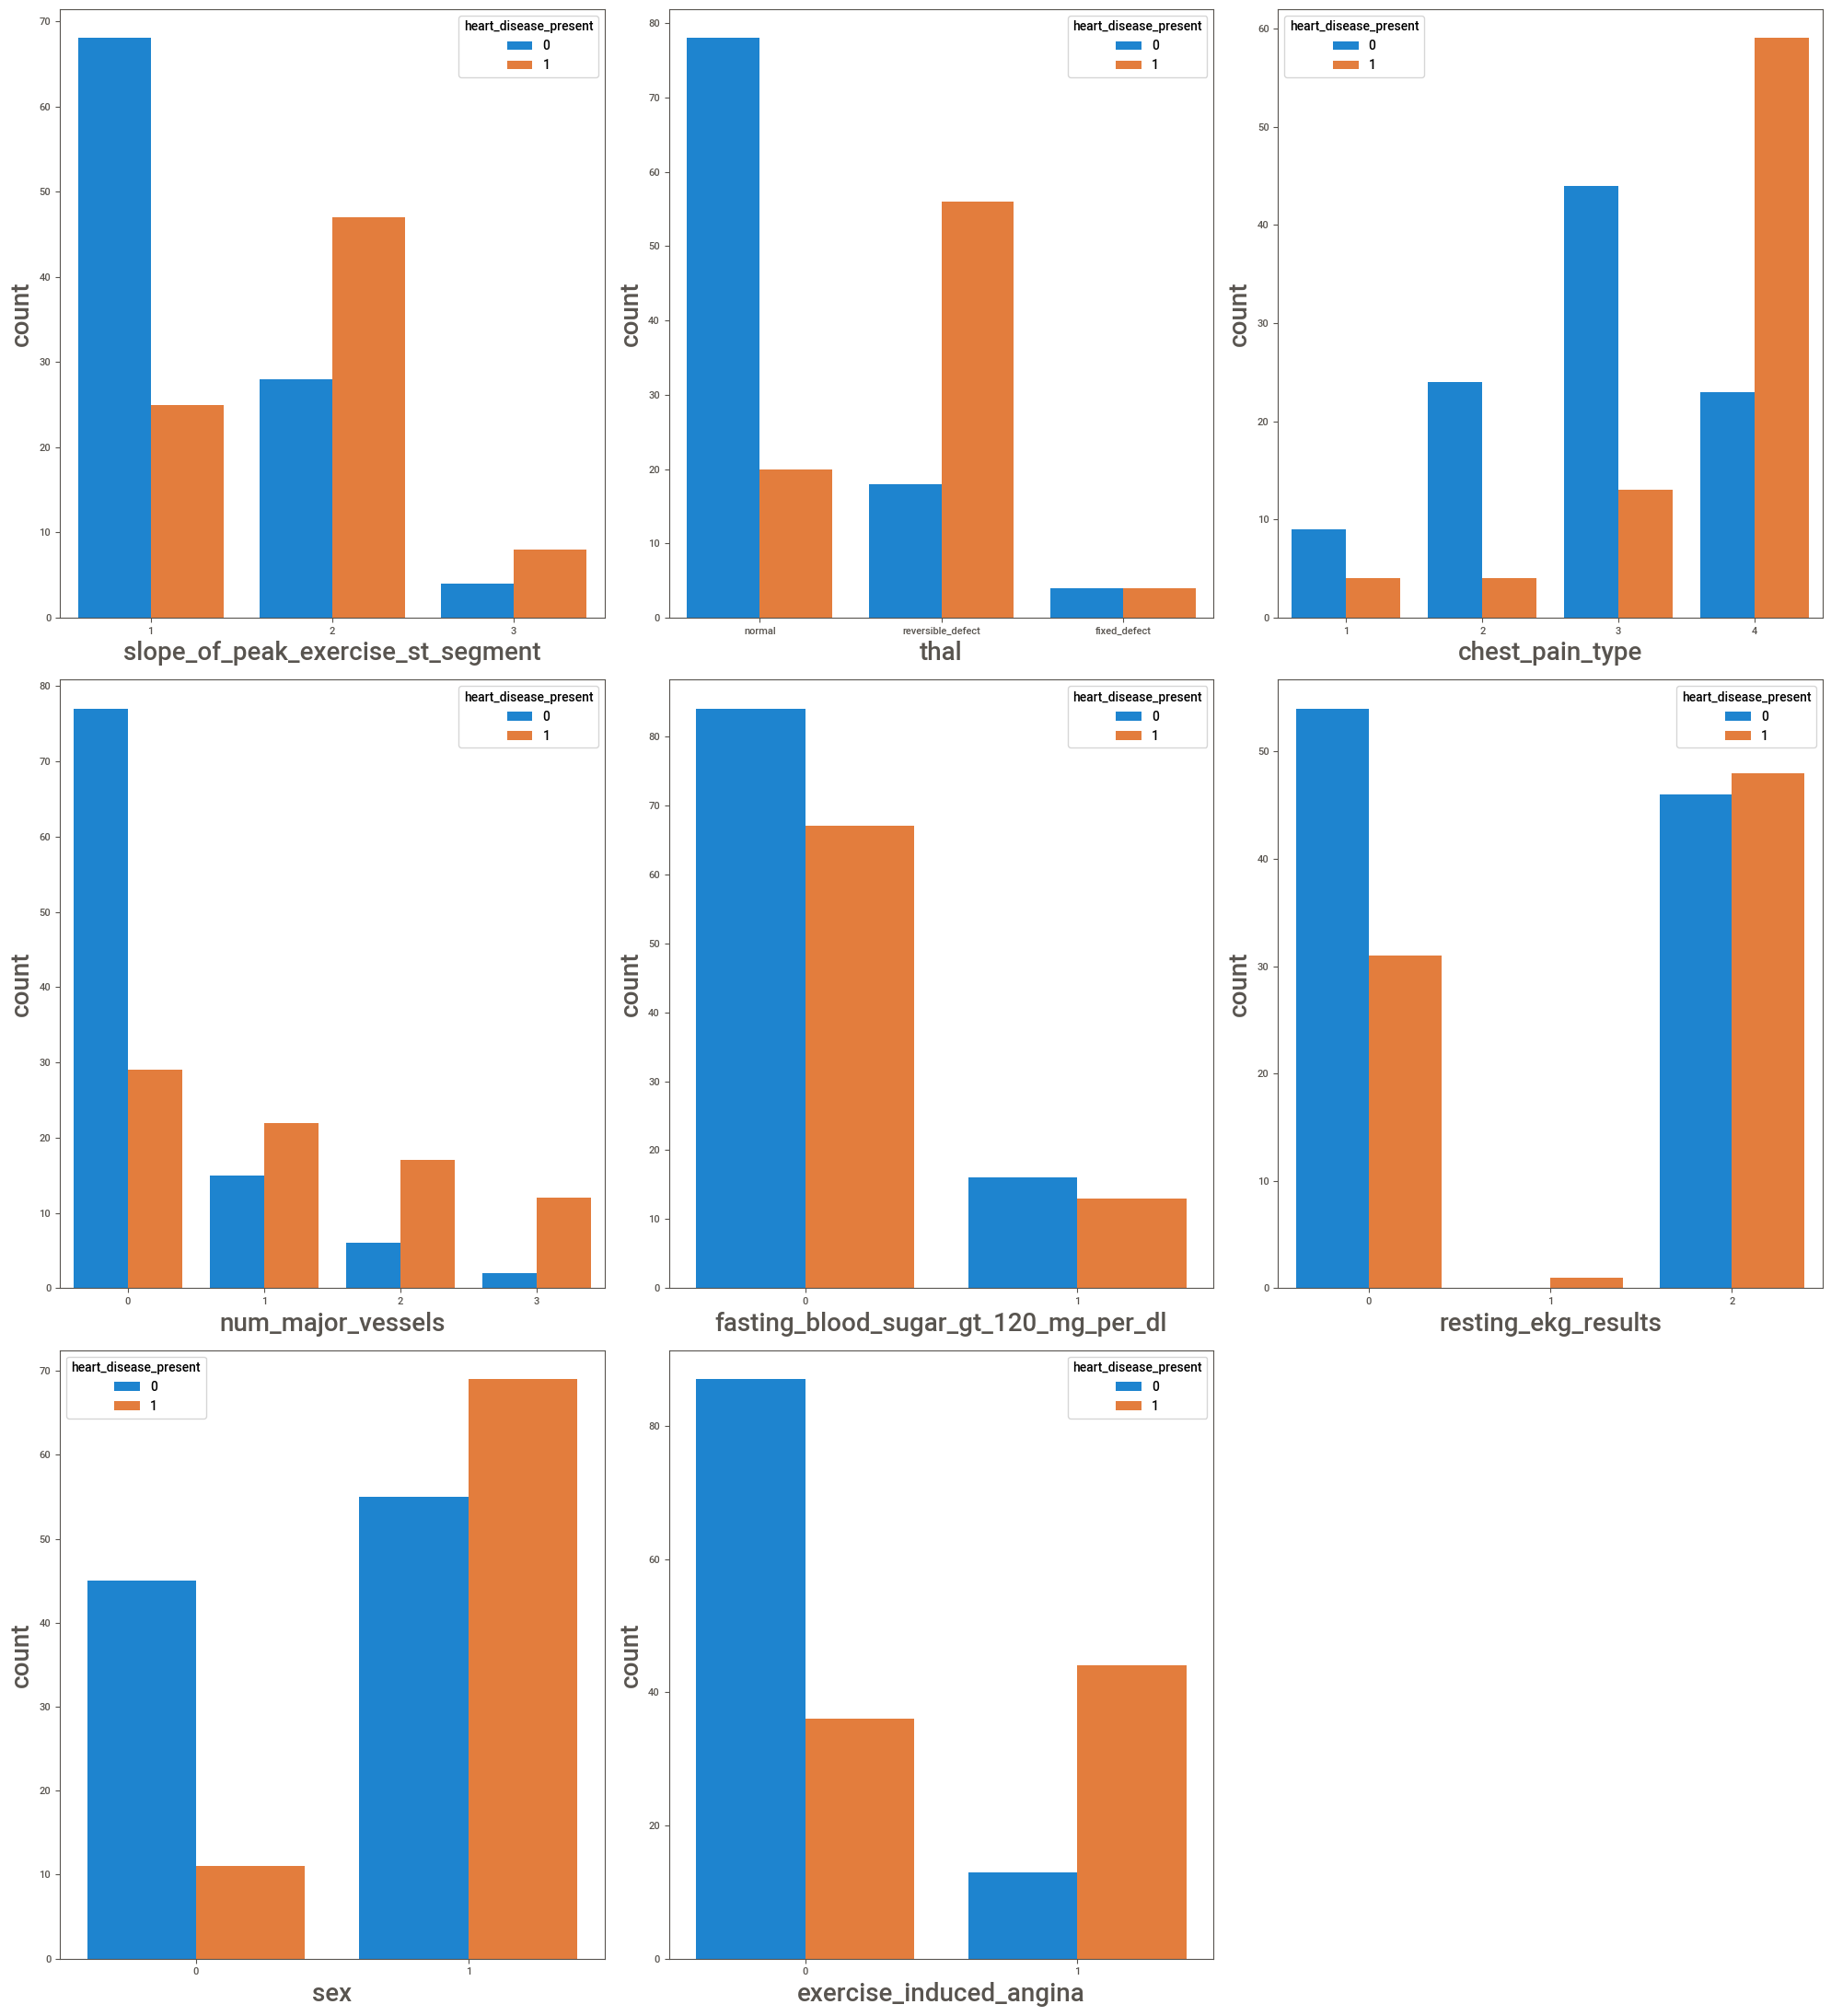

In [1487]:
plt.figure(figsize=(20,22))
n = 1  
for i in categorical:
    if n<9 :     # set the limit
        plt.subplot(3,3,n) 
        sns.countplot(x=heart[i],hue=heart.heart_disease_present)
        plt.xlabel(i,fontsize=20) 
        plt.ylabel('count',fontsize=20) 
    n+=1 # increment of plotnumber 
plt.tight_layout()
plt.show() 

#### Observations:
#### 1. Impact of Slope of Peak ST Segment on Heart Disease:
- Comparing the ratio it can be seen that 66.6% of people with downsloping suffers from heart disease.
- Patients with an upsloping slope of the peak ST segment have a lower chance of heart disease compared to other two slopes.
- Patients with a flat slope and downslopping have a higher chance of heart disease than those with an upsloping slope.
- Based on these observations, it can be concluded that the slope of the peak ST segment significantly impacts heart disease.

#### 2. Impact of Thalassemia on Heart Disease:
- Patients with normal blood disorder have a lower chance of heart disease compared to other thalassemia types.
- Patients with reversible defect blood disorder have a higher chance of heart disease
- while patiens with fixed defect blood disorder has a roughly equal chance of suffering from heart disease.
- Thalassemia type has a notable impact on heart disease risk.

#### 3. Impact of Chest Pain Type on Heart Disease:
- Patients with asymptomatic (4) chest pain have a higher chance of heart disease.
- followed by typical angina (1), the graph shows almost one third of the patients with typical angina has heart disease.
- Non-anginal pain (3)and atypical angina (2) are associated with lower chances of heart disease.
- All types of chest pain influence the likelihood of heart disease.

#### 4. Impact of Fasting Blood Sugar on Heart Disease:
- The graph indicates that the occurrence of heart disease is equally influenced by fasting blood sugar levels (0 and 1)
- Because the ratio between the two categories is almost same.

#### 5. Impact of Gender on Heart Disease:
- Male patients have very higher chance of heart disease compared to female patients.

#### 6. Impact of Number of Major Vessels on Heart Disease:
- Patients with zero major vessels colored by fluoroscopy have a lower chance of heart disease, but it's not negligible.
- Patients with 1, 2, or 3 major vessels colored have a higher chance of heart disease with 3 being the highest followed by 2 and 1.

#### 7. Impact of Resting EKG Results on Heart Disease:
- Patients with a normal (0) resting electrocardiographic result have a lower chance of heart disease comparatively.
- Patients with a result of 1 have a 100% chance of heart disease.
- A result of 2 indicates more than 50% chance of heart disease.

#### 8. Impact of Exercise-Induced Angina:
- Patients without exercise-induced chest pain have a lower chance of heart disease.
- Patients with exercise-induced chest pain are more likely to have heart disease.

These observations highlight the significant impacts of various factors on the likelihood of heart disease. It's evident that each feature plays a role in influencing heart disease risk, and understanding these relationships is crucial for accurate prediction and diagnosis.

### ANALYSIS ON NUMERICAL VERIABLE WITH RESPECT TO TARGET VERIBLE (HEART DISEASE)

In [1488]:
Numerical=heart.drop(columns=categorical)

In [1489]:
Numerical.drop(columns=['heart_disease_present'],inplace=True)

In [1490]:
Numerical.columns

Index(['resting_blood_pressure', 'serum_cholesterol_mg_per_dl',
       'oldpeak_eq_st_depression', 'age', 'max_heart_rate_achieved'],
      dtype='object')

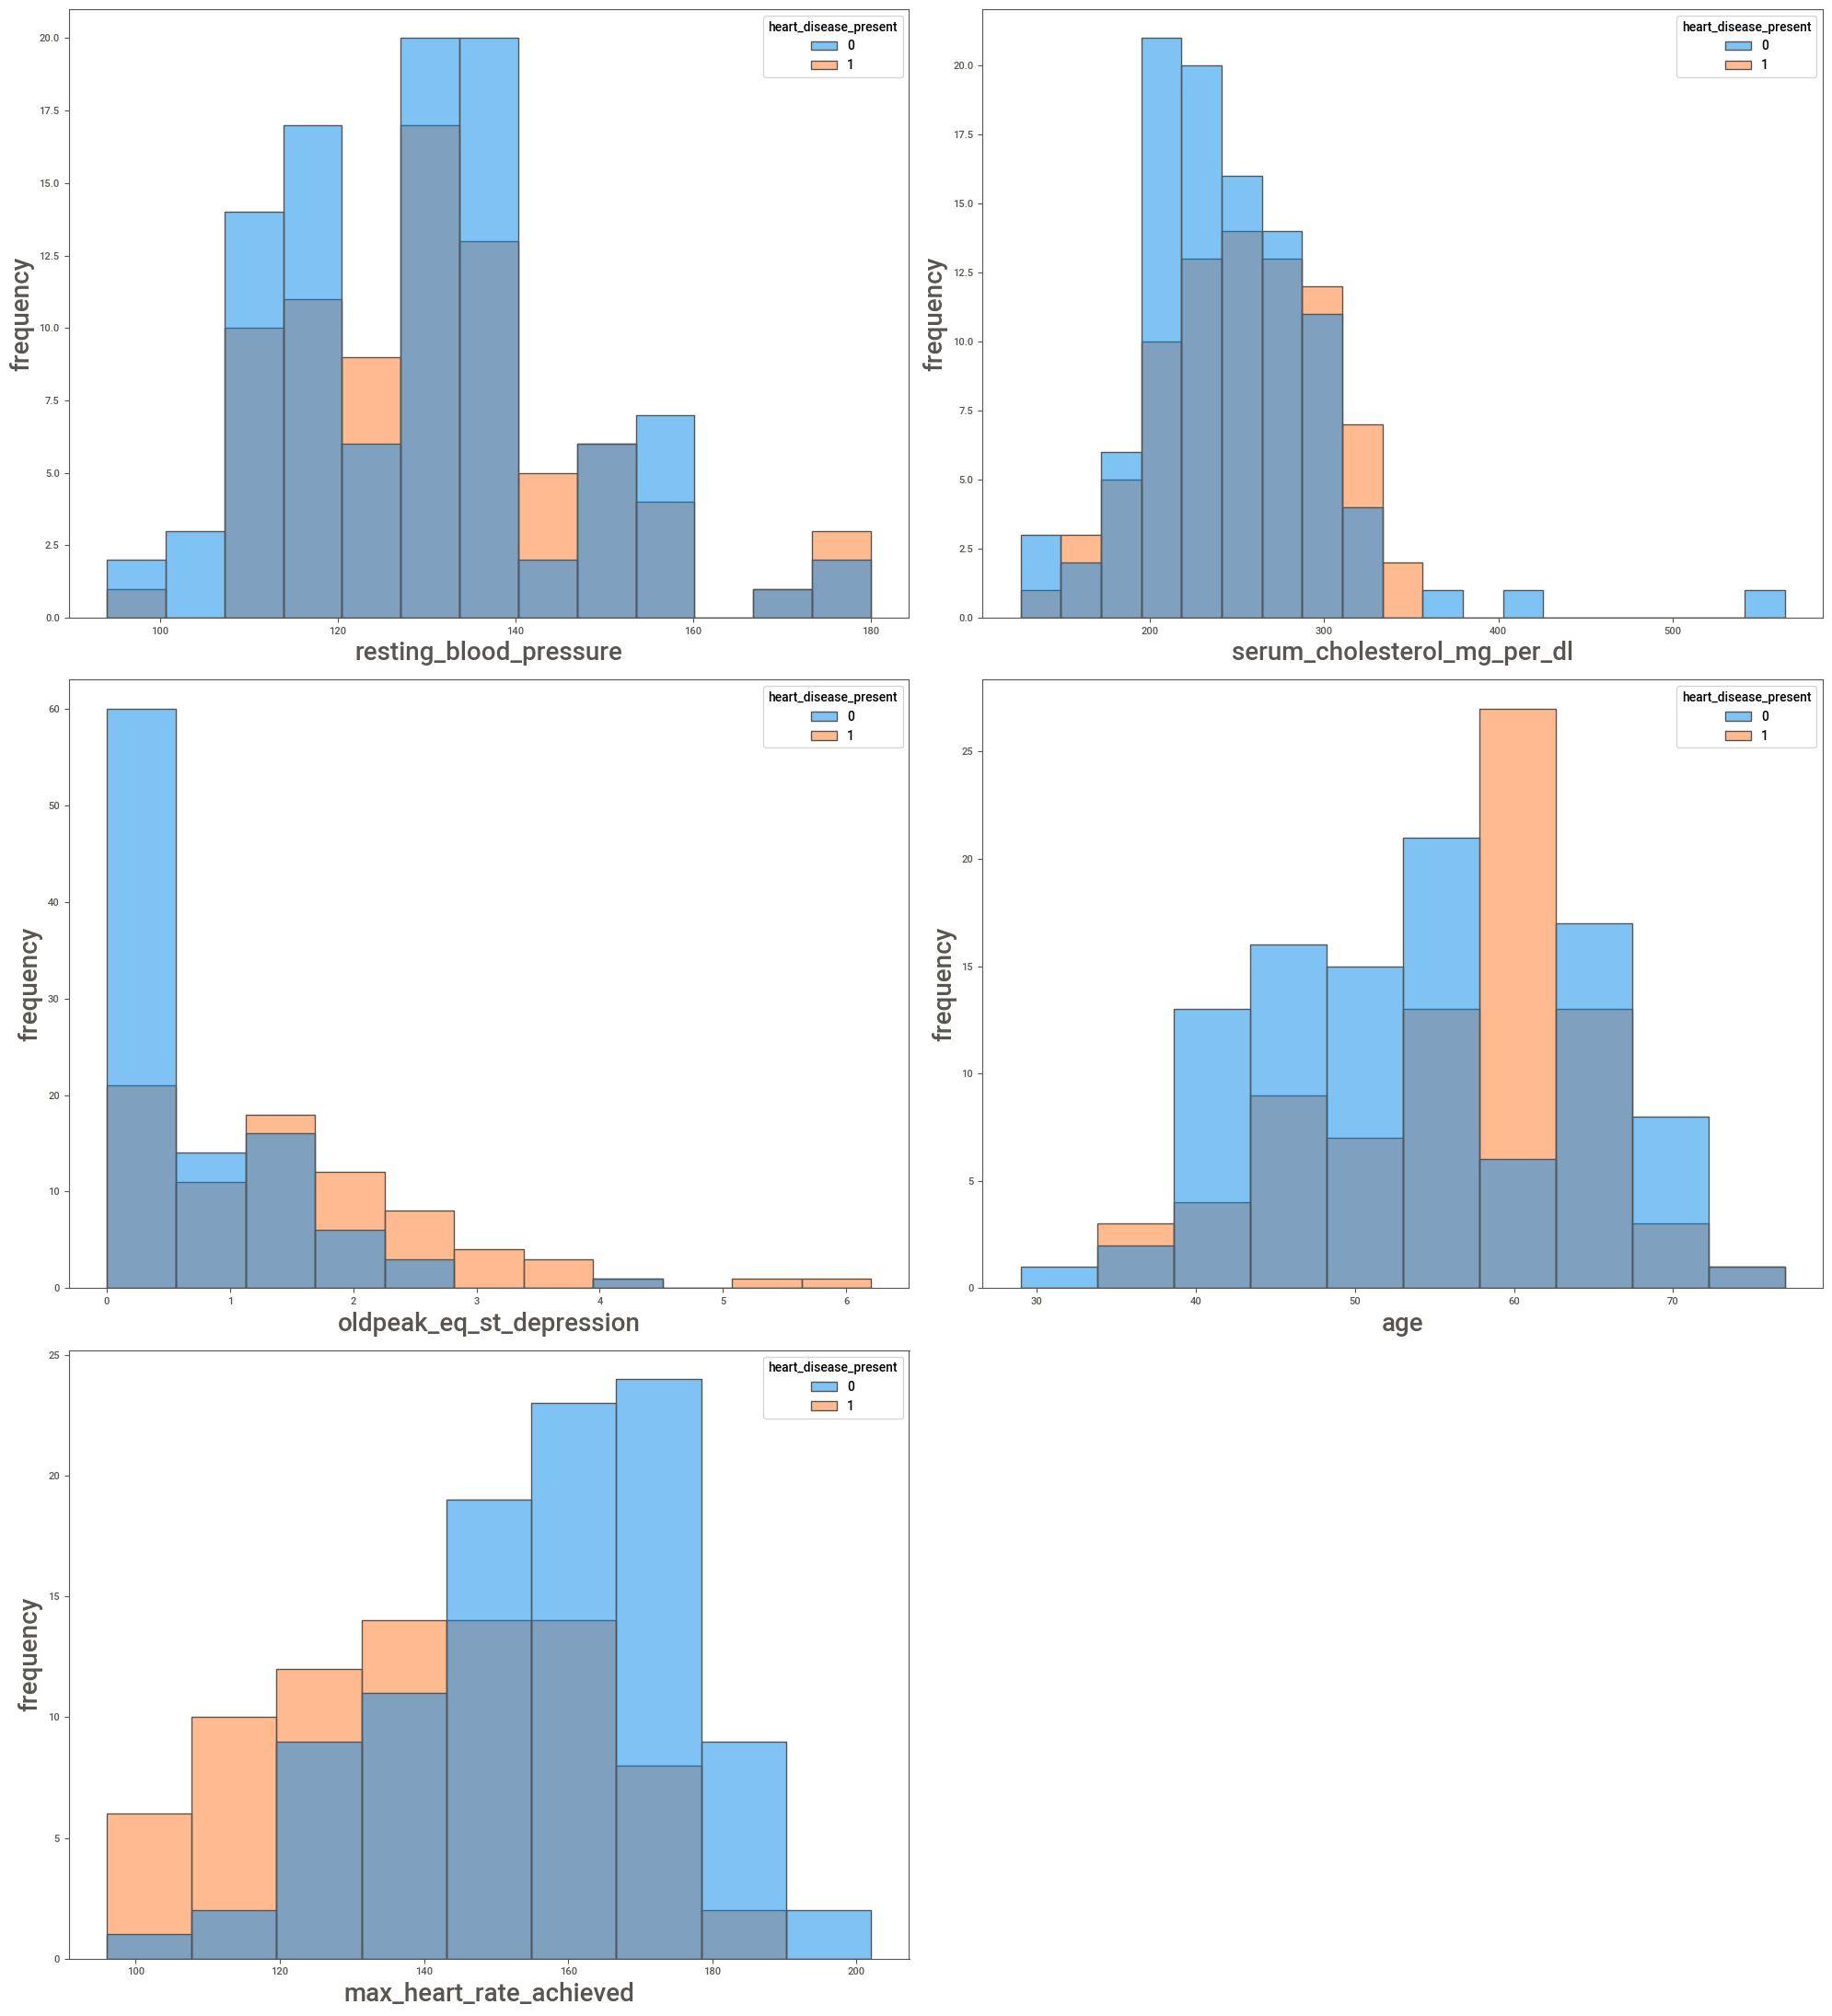

In [1491]:
plt.figure(figsize=(20,22))
n = 1  
for i in Numerical:
    if n<6 :     # set the limit
        plt.subplot(3,2,n) 
        sns.histplot(x=heart[i],hue=heart.heart_disease_present)
        plt.xlabel(i,fontsize=20) 
        plt.ylabel('frequency',fontsize=20) 
    n+=1 # increment of plotnumber 
plt.tight_layout()
plt.show() 

#### OBSERVATIONS:
#### 1. EFFECT OF RESTING BLOOD PRESSURE ON HEART DISEASE:
- When resting blood pressure falls aabove 110 the likelihood of heart disease increases.
- Lower resting blood pressure appears to be associated with a slightly reduced risk of heart disease.

#### 2. IMPACT OF SERUM CHOLESTEROL ON HEART DISEASE:
- If serum cholesterol levels are under 350, the chances of heart disease are uncertain, with roughly equal probabilities.
- Serum cholesterol exceeding 350 seems to show no correlation with heart disease.

#### 3. INFLUENCE OF OLD PEAK DEPRESSION ON HEART DISEASE:
- A lower value of old peak depression is linked to a decreased likelihood of heart disease.
- Old peak depression exceeding 1 corresponds to an elevated chance of heart disease.

#### 4. AGE AND ITS CONNECTION TO HEART DISEASE:
- Individuals around the age of 60 face an increased risk of heart disease
- while those aged 40 to 70 have less than 50% likelihood.
- Heart disease is unlikely in individuals under the age of 30.

#### 5. MAXIMUM HEART RATE'S ROLE IN HEART DISEASE:
- A heart rate below 140 appears to be associated with an elevated risk of heart disease.
- When the heart rate is above 140, the probability of heart disease is approximately equal.
- Heart rates surpassing 180 show no apparent correlation with heart disease risk.

### Data Preprocessing

In [1492]:
heart.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [1493]:
# checking null values
heart.isnull().sum()

slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

There is no missing values

### Categorical Encoding
- There are different techniques to convert categorical data to numeric such as: label encoding, dummy encoding, one hot encoding, frequency encoding, target guided ordinal encoding, mean encoding, etc.
- Here every categorical column except thal has already been label encoded.
- We have used manual label encoding for thal column because it is an ordinal column , means there is a hierarchy between the values in the column.
- fixed_defect is risky than reversible_defect and reversible_defect is risky than normal.
- fixed defect is assign with value 0 
- reversible defect assign with value 1 because of less weightage than fixed defect
- normal assign with value 2.

In [1494]:
heart.thal.value_counts()

normal               98
reversible_defect    74
fixed_defect          8
Name: thal, dtype: int64

In [1495]:
heart.thal = heart.thal.map({'normal':2,'reversible_defect':1,'fixed_defect':0})

### OUTLIER HANDLING
- Outliers are data points that significantly deviate from the rest of the dataset.
- By identifying and addressing outliers, we ensure that the model's performance remains robust and unaffected by extreme values

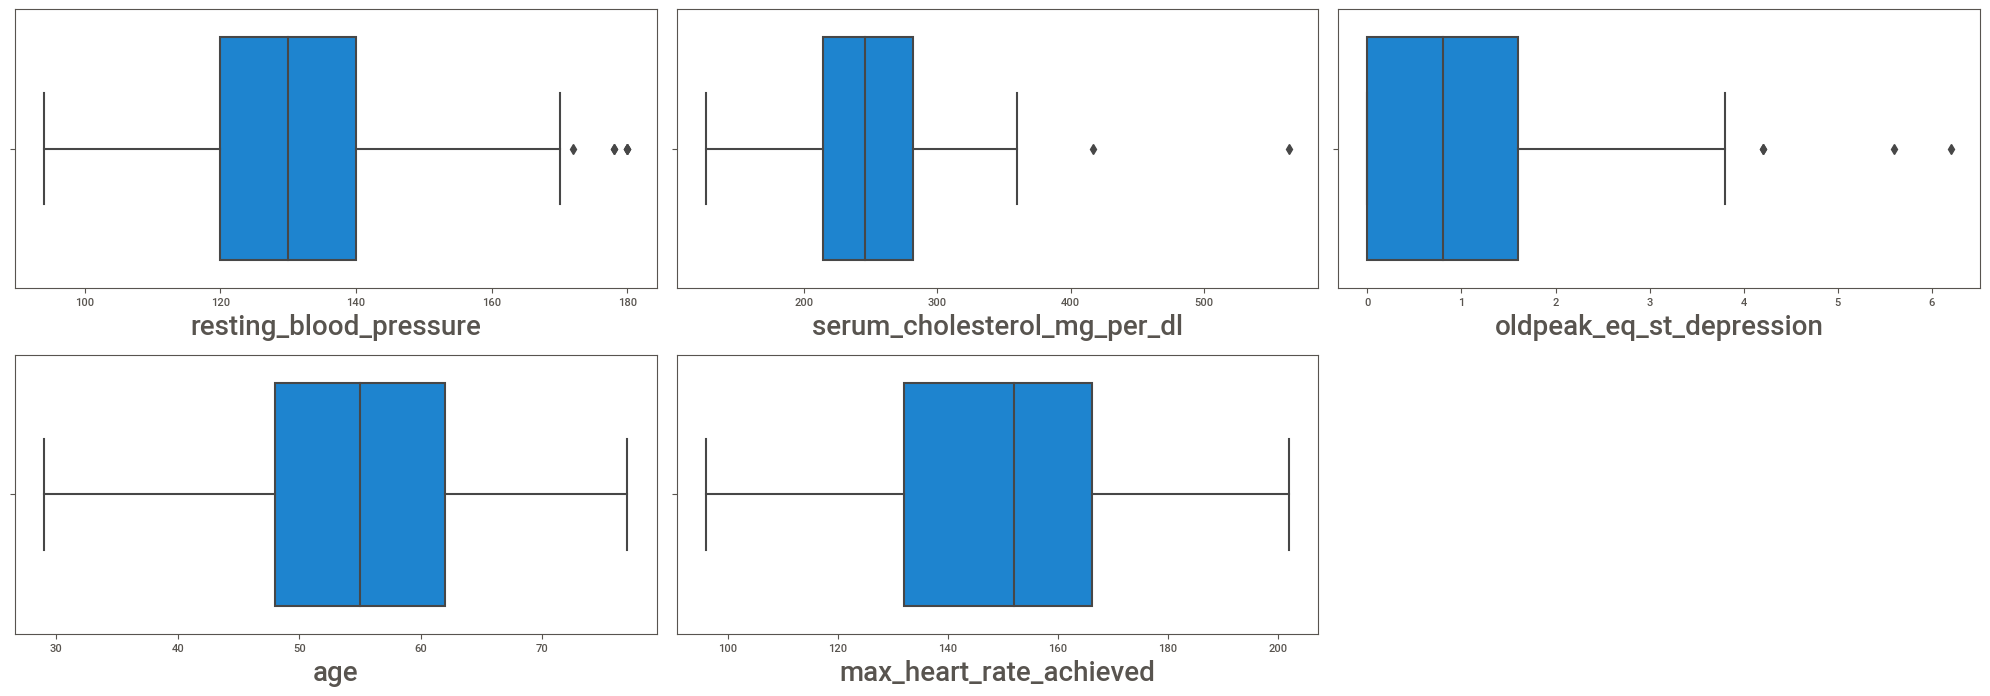

In [1496]:
plt.figure(figsize=(20,10)) # defining canvas size
n = 1 

for i in Numerical: 
    if n<=9:    # set the limit
        plt.subplot(3,3,n) 
        sns.boxplot(x=heart[i]) # Plotting box plots 
        plt.xlabel(i,fontsize=20)  # assigning name to x-axis and font size is 20
    n+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction

##### CHECKING THE DISTRIBUTION 

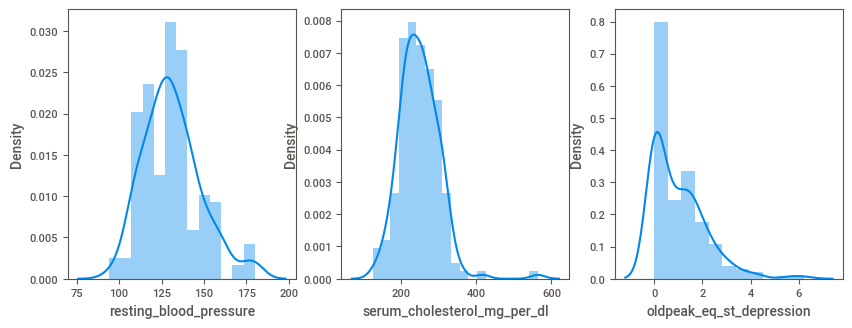

In [1497]:
Data= ['resting_blood_pressure', 'serum_cholesterol_mg_per_dl',
       'oldpeak_eq_st_depression']

plt.figure(figsize=(10,3.5)) # defining canvas size
n = 1 # counter

for i in Data: 
    if n<=5:    
        plt.subplot(1,3,n)
        sns.distplot(x=heart[i]) # Plotting box plots 
        plt.xlabel(i)  # assigning name to x-axis and font size is 20
    n+=1 # counter increment

In [1498]:
heart.oldpeak_eq_st_depression.mean()

1.01

In [1499]:
heart.oldpeak_eq_st_depression.median()

0.8

#### Mean Imputation
- Here the resting_blood_prssure and serum_cholesterol are almost uniformly distributed so we can replace with mean
- for oldpeak_depression also we can replace the outliers with mean , because there is not much difference between the mean and median values.
- Replacing outliers with the mean is preferred over the median as it preserves the overall central tendency of the data.

In [1500]:
from scipy import stats
for i in Data:
    iqr=stats.iqr(heart[i])
    Q3 = heart[i].quantile(0.75)
    max_limit=Q3+1.5*iqr
    heart.loc[heart[i] > max_limit ,i]=np.mean(heart[i])
    

### Finding correlated columns
- When we remove columns that are strongly related to each other, the dataset becomes smaller. This helps algorithms for sorting things into categories work faster and use less computer power.
- It makes the model simpler and easier to understand, but it still works well at deciding categories overall.
- Columns that are very similar give us the same information twice, which we don't need.

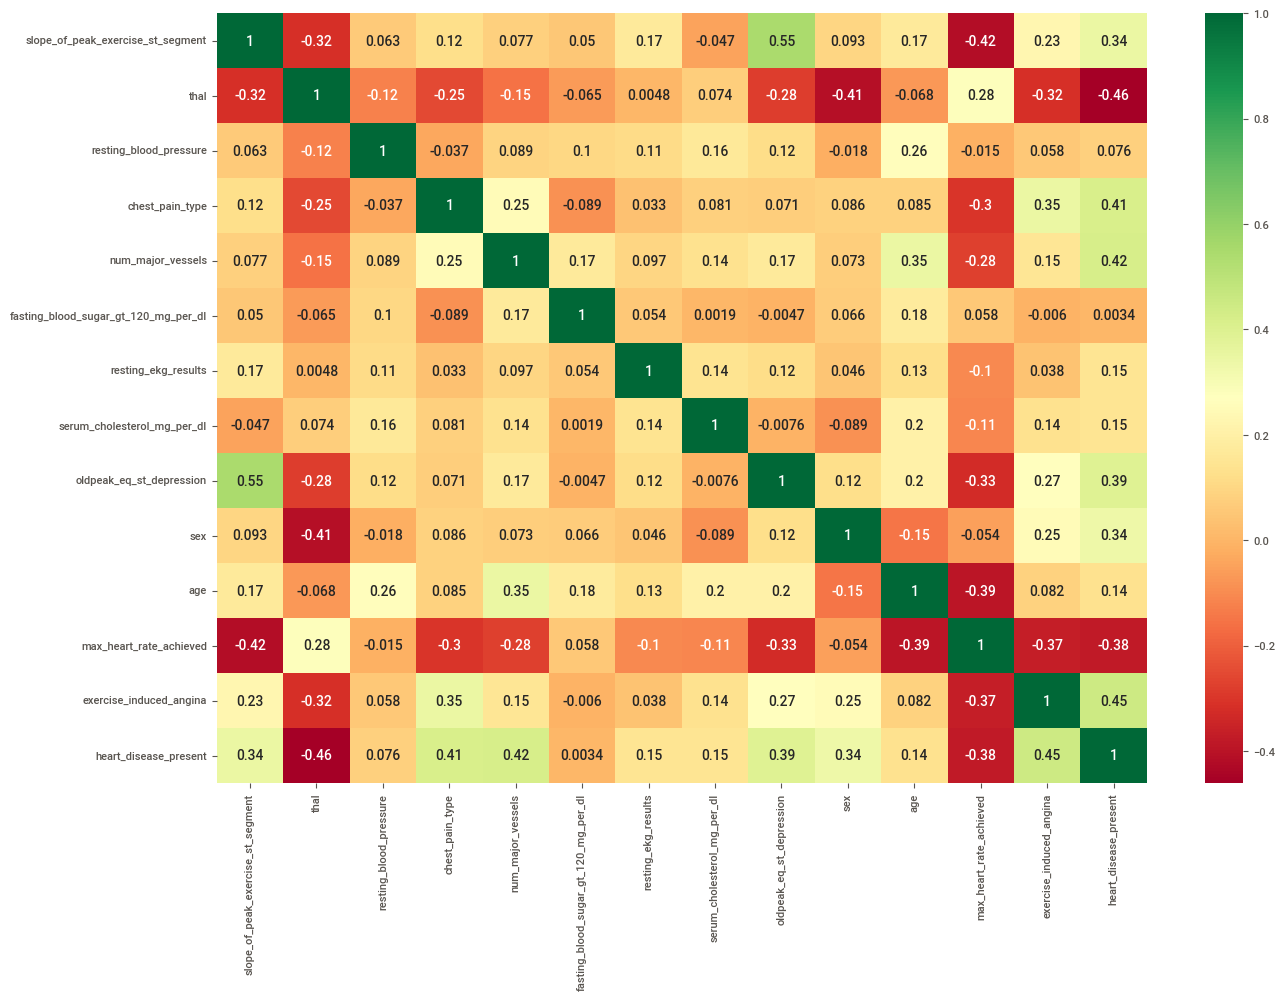

In [1501]:
# Plot hitmap for better visualisation
plt.figure(figsize=(15,10))
sns.heatmap(heart.corr(),annot=True,cmap='RdYlGn',annot_kws={'size':10})
plt.show()

- no column or features is highly correlated
- the maximum correlation we have is between oldpeak_depression and slope_of_peakexercise which is 0.55.
- so no column is dropped

### Scaling the data
- we are using StandardScalar,it centers the data around zero and scales it to have a standard deviation of 1
- here we are scaling only very large features.

In [1502]:
from sklearn.preprocessing import StandardScaler

In [1503]:
s=StandardScaler()
heart[['resting_blood_pressure','serum_cholesterol_mg_per_dl','oldpeak_eq_st_depression','age','max_heart_rate_achieved']] = s.fit_transform(heart[['resting_blood_pressure','serum_cholesterol_mg_per_dl','oldpeak_eq_st_depression','age','max_heart_rate_achieved']])

In [1504]:
heart.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,2,-0.120408,2,0,0,2,1.357762,-0.990783,1,-1.053964,0.932485,0,0
1,2,2,-1.355497,3,0,0,0,-0.718533,0.731902,0,-0.087134,0.387084,0,0
2,1,2,-0.326257,4,3,0,2,1.269409,-0.990783,1,2.383654,0.568884,1,1
3,1,1,1.526376,4,0,0,0,-0.519739,-0.990783,1,-1.591092,1.432436,0,1
4,3,1,0.106787,1,0,0,2,0.518408,0.096662,1,0.449994,-0.203768,0,0


In [1505]:
heart.heart_disease_present.value_counts()

0    100
1     80
Name: heart_disease_present, dtype: int64

- here the data is almost balanced so no need to use SMOTE technique

### Model Training and Evaluation with different classification algorithm
- In the context of a heart disease prediction problem, the recall score (also known as sensitivity or true positive rate) is often considered more important because of the critical nature of correctly identifying positive cases, i.e., correctly identifying individuals who have heart disease.
- Here we need to give more important to both accuracy and recall score 

In [1506]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [1507]:
# splitting dependent and independent variale to train and test
x=heart.drop(columns='heart_disease_present')
y = heart.heart_disease_present
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=8)

In [1508]:
x_train.shape

(144, 13)

In [1509]:
y_test.shape

(36,)

In [1510]:
# importing the metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,recall_score

### 1.Logistic Regression 

In [1511]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()
logistic.fit(x_train,y_train)
y_l_p=logistic.predict(x_test)

In [1512]:
# training data-accuracy score
logistic.score(x_train,y_train)

0.875

In [1513]:
# testing data-accuracy score
log_accuracy=accuracy_score(y_test,y_l_p)
log_recall=recall_score(y_test,y_l_p)
print('accuracy score:',log_accuracy)
print('recall score:',log_recall)
cm=confusion_matrix(y_test,y_l_p)

accuracy score: 0.8333333333333334
recall score: 0.7857142857142857


In [1514]:
print(classification_report(y_test,y_l_p))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        22
           1       0.79      0.79      0.79        14

    accuracy                           0.83        36
   macro avg       0.82      0.82      0.82        36
weighted avg       0.83      0.83      0.83        36



### 2.Support Vector Classification 

In [1515]:
from sklearn.svm import SVC

In [1516]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(4):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(x_train, y_train)
    svc_scores.append(svc_classifier.score(x_test, y_test))

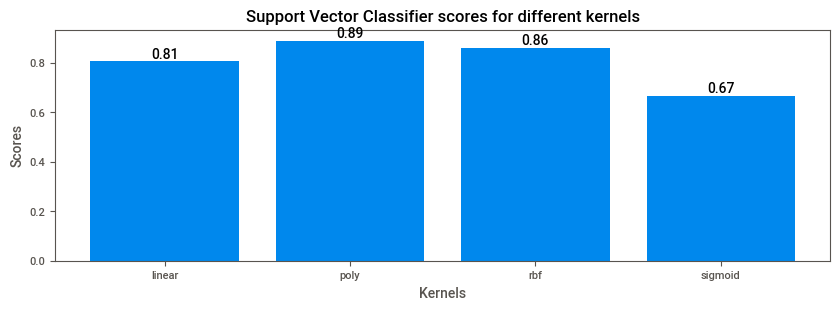

In [1517]:
plt.figure(figsize=(10,3))
plt.bar(kernels, svc_scores)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], format(svc_scores[i], '.2f'), ha='center', va='bottom')
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')
plt.show()

- Here we can see that kernel='rbf' performs better than other models

In [1518]:
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
y_s_p=svc.predict(x_test)

In [1519]:
# training data-accuracy score
svc.score(x_train,y_train)

0.9097222222222222

In [1520]:
svc_accuracy=accuracy_score(y_test,y_s_p)
svc_recall=recall_score(y_test,y_s_p)
print('accuracy score:',svc_accuracy)
print('recall score:',svc_recall)

accuracy score: 0.8888888888888888
recall score: 0.8571428571428571


In [1521]:
print(classification_report(y_test,y_s_p))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        22
           1       0.86      0.86      0.86        14

    accuracy                           0.89        36
   macro avg       0.88      0.88      0.88        36
weighted avg       0.89      0.89      0.89        36



### 3.K-nearest Neighbor Model (KNN)

In [1522]:
from sklearn.neighbors import KNeighborsClassifier
recall = []
accuracy=[]
for i in range(1,12):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_knn_p = knn.predict(x_test)
    recall.append(recall_score(y_test,y_knn_p))
    accuracy.append(accuracy_score(y_knn_p,y_test))
print("recall:",recall)
print('accuracy:',accuracy)

recall: [0.7142857142857143, 0.7142857142857143, 0.8571428571428571, 0.5, 0.6428571428571429, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.6428571428571429, 0.5714285714285714, 0.6428571428571429]
accuracy: [0.7222222222222222, 0.8611111111111112, 0.8333333333333334, 0.75, 0.75, 0.7777777777777778, 0.7222222222222222, 0.7777777777777778, 0.7222222222222222, 0.7777777777777778, 0.7222222222222222]


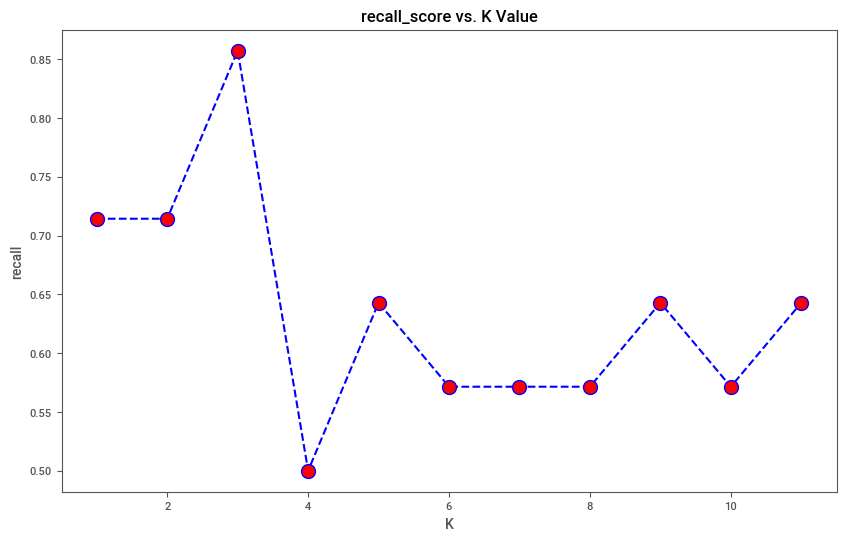

In [1523]:
# Plotting the recall score
plt.figure(figsize=(10,6))
plt.plot(range(1,12),recall,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title('recall_score vs. K Value')
plt.xlabel('K')
plt.ylabel('recall')
plt.show()

- at k=3 we have high accuracy and recall score

In [1524]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_knn_p=knn.predict(x_test)

In [1525]:
# training data-accuracy score
knn.score(x_train,y_train)

0.8611111111111112

In [1526]:
knn_accuracy=accuracy_score(y_test,y_knn_p)
knn_recall=recall_score(y_test,y_knn_p)
print('accuracy score:',knn_accuracy)
print('recall score:',knn_recall)

accuracy score: 0.8333333333333334
recall score: 0.8571428571428571


In [1527]:
print(classification_report(y_test,y_knn_p))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        22
           1       0.75      0.86      0.80        14

    accuracy                           0.83        36
   macro avg       0.82      0.84      0.83        36
weighted avg       0.84      0.83      0.83        36



### 4. Decision Tree

In [1528]:
from sklearn.tree import DecisionTreeClassifier
d=DecisionTreeClassifier()
d.fit(x_train,y_train)

DecisionTreeClassifier()

In [1529]:
# training data-accuracy score
d.score(x_train,y_train)

1.0

In [1530]:
y_d_p=d.predict(x_test)
tree_recall=recall_score(y_test,y_d_p)
tree_accuracy=accuracy_score(y_test,y_d_p)
print('accuracy score:',tree_accuracy)
print('recall score:',tree_recall)

accuracy score: 0.6388888888888888
recall score: 0.7142857142857143


### Hyperparameter tuning of Decision tree

In [1531]:
params={
    'max_depth':list(range(10,20)),
    'min_samples_split':(2,3,4,5),
    'min_samples_leaf':list(range(1,10))}
g=GridSearchCV(d,param_grid=params,cv=3,scoring='accuracy',n_jobs=-1)#n_jobs to run in paralell -1 means all
g.fit(x_train,y_train)
print(g.best_params_)
print(g.best_score_)

{'max_depth': 15, 'min_samples_leaf': 6, 'min_samples_split': 5}
0.7777777777777778


In [1532]:
D=DecisionTreeClassifier(max_depth=17, min_samples_leaf=6,min_samples_split= 2)
D.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=17, min_samples_leaf=6)

In [1533]:
# training data-accuracy score
D.score(x_train,y_train)

0.8888888888888888

In [1534]:
y_D_p=D.predict(x_test)
Tree_recall=recall_score(y_test,y_D_p)
Tree_accuracy=accuracy_score(y_test,y_D_p)
print('accuracy score:',Tree_accuracy)
print('recall score:',Tree_recall)

accuracy score: 0.7222222222222222
recall score: 0.7142857142857143


In [1535]:
print(classification_report(y_test,y_D_p))

              precision    recall  f1-score   support

           0       0.80      0.73      0.76        22
           1       0.62      0.71      0.67        14

    accuracy                           0.72        36
   macro avg       0.71      0.72      0.71        36
weighted avg       0.73      0.72      0.72        36



- the accuracy rises after parameter tuning from 0.63 to 0.72

### 5.Random Forest Classifier

In [1536]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(x_train,y_train)

# Step:3 Prediction on testing data
y_rf_predict = rf.predict(x_test)


In [1537]:
rf.score(x_train,y_train)

1.0

In [1538]:
rf_accuracy = accuracy_score(y_test,y_rf_predict)
rf_recall = recall_score(y_test,y_rf_predict)
print('accuracy score:',rf_accuracy)
print('recall score:',rf_recall)
print("Classification report of training: \n",classification_report(y_test,y_rf_predict))

accuracy score: 0.7777777777777778
recall score: 0.7857142857142857
Classification report of training: 
               precision    recall  f1-score   support

           0       0.85      0.77      0.81        22
           1       0.69      0.79      0.73        14

    accuracy                           0.78        36
   macro avg       0.77      0.78      0.77        36
weighted avg       0.79      0.78      0.78        36



### Hyperparameter tuning of Random Forest 

In [1539]:

from sklearn.model_selection import RandomizedSearchCV  

n_estimators = [int(x) for x in np.linspace(start=100 ,stop=2000, num=10)] #No of decision tree in forest
max_features = ['auto', 'sqrt'] #Max no of feature consider to create decision tree
max_depth    = [int(x) for x in np.linspace(10,100,num=11)] 
min_samples_split = [2,3,5,10] #Min number of data points placed in a node before the node is split
min_samples_leaf  = [1,2,3,4,5]  #Min number of data point allowed in leaf node

# Step:2 Creating dictionary of paramter
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

# Step:3 Object creation
RF = RandomForestClassifier(random_state=42) #Provide random state because select rows and columns randomly

# Step:4 Create Random search CV with parameter
rf_cv = RandomizedSearchCV(estimator=RF,scoring='accuracy',param_distributions=random_grid,
                           n_iter=100,cv=2,verbose=2,random_state=42,n_jobs=-1)

# Step:5 Fitting the training data
rf_cv.fit(x_train,y_train)


print(rf_cv.best_params_)
print(rf_cv.best_score_)


Fitting 2 folds for each of 100 candidates, totalling 200 fits
{'n_estimators': 1366, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 100}
0.8194444444444444


In [1540]:
R = RandomForestClassifier(n_estimators=1366,min_samples_split=10,min_samples_leaf=3,max_features='auto',max_depth=100)

R.fit(x_train,y_train)

# Step:3 Prediction on testing data
y_R_p = rf.predict(x_test)

In [1541]:
R.score(x_train,y_train)

0.9097222222222222

In [1542]:
R_accuracy = accuracy_score(y_test,y_R_p)
R_recall = recall_score(y_test,y_R_p)
print('accuracy score:',R_accuracy)
print('recall score:',R_recall)
print("Classification report of training: \n",classification_report(y_test,y_R_p))

accuracy score: 0.7777777777777778
recall score: 0.7857142857142857
Classification report of training: 
               precision    recall  f1-score   support

           0       0.85      0.77      0.81        22
           1       0.69      0.79      0.73        14

    accuracy                           0.78        36
   macro avg       0.77      0.78      0.77        36
weighted avg       0.79      0.78      0.78        36



- no rise in accuracy and recall score after parameter tuning

### 6.XGBClassifier

In [1543]:
# Step:1 import library and object creation
import xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier()

xgb.fit(x_train,y_train)

# Step:3 Prediction on training data
y_xgb_predict = xgb.predict(x_test)


In [1544]:
xgb.score(x_train,y_train)

1.0

In [1545]:
xgb_accuracy = accuracy_score(y_test,y_xgb_predict)
xgb_recall = recall_score(y_test,y_xgb_predict)
print('accuracy score:',xgb_accuracy)
print('recall score:',xgb_recall)
print("Classification report of training: \n",classification_report(y_test,y_xgb_predict))

accuracy score: 0.6944444444444444
recall score: 0.7857142857142857
Classification report of training: 
               precision    recall  f1-score   support

           0       0.82      0.64      0.72        22
           1       0.58      0.79      0.67        14

    accuracy                           0.69        36
   macro avg       0.70      0.71      0.69        36
weighted avg       0.73      0.69      0.70        36



### Hyperparameter tuning of XGDBOOST

In [1546]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.001,0.01,0.1, 0.03, 0.06, 0.1, 0.15, 0.02, 0.25,0.003,0.0003, 0.3,0.04, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.01,0.1,0.02,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.01,0.1,0.02,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

# Step:2 Object creation with parameter
XGB = XGBClassifier(random_state=42)

# Step:3 Create randomized search cv with parameter
rcv = RandomizedSearchCV(estimator=XGB,scoring='f1',param_distributions=param_grid,n_iter=60,
                        cv=4,verbose=2,random_state=42,n_jobs=-1)

# Step:5 Fitting the training data
rcv.fit(x_train,y_train)


print(rcv.best_params_)
print(rcv.best_score_)

Fitting 4 folds for each of 60 candidates, totalling 240 fits
{'reg_lambda': 12.8, 'reg_alpha': 0.4, 'n_estimators': 115, 'max_depth': 9, 'learning_rate': 0.7, 'gamma': 0.1}
0.7806372549019608


In [1547]:
XGB2 = XGBClassifier(reg_lambda=12.8,reg_alpha=0.4,n_estimators=115,max_depth=9,learning_rate=0.7,gamma=0.1)

# Step:7 Fitting the training data
XGB2.fit(x_train,y_train)

# Step:8 Prediction on testing data
y_XGB_prediction = XGB2.predict(x_test)

In [1548]:
XGB2.score(x_train,y_train)

0.9861111111111112

In [1549]:
XGB_accuracy = accuracy_score(y_test,y_XGB_prediction)
XGB_recall = recall_score(y_test,y_XGB_prediction)
print('accuracy score:',XGB_accuracy)
print('recall score:',XGB_recall)
print("Classification report of training: \n",classification_report(y_test,y_XGB_prediction))

accuracy score: 0.75
recall score: 0.7857142857142857
Classification report of training: 
               precision    recall  f1-score   support

           0       0.84      0.73      0.78        22
           1       0.65      0.79      0.71        14

    accuracy                           0.75        36
   macro avg       0.74      0.76      0.75        36
weighted avg       0.77      0.75      0.75        36



- the accuracy rises after parameter tuning from 0.69 to 0.75

### Model Comparison report
- The heart disease dataset is preprocessed and trained using 6 different models and their results are compared.

1.Logistic Regression:
-  The logistic regression model achieved a training accuracy of 87.5%. This indicates that the model was able to learn and fit the training data relatively well.
- The testing accuracy of 83.33% suggests that the model's performance on unseen data is also good.
- The testing recall score of 0.7857 (or approximately 78.57%) implies that the model is capable of identifying around 78.57% of the true positive cases (actual instances of heart disease) from the entire positive class. 
- This suggests that the model has a reasonable ability to correctly identify individuals with heart disease, which is crucial in a medical context.


2.Support Vector Classification:
- Among the evaluated kernel tricks, the "poly" kernel demonstrated the best performance with a testing accuracy score of 0.89, surpassing other kernels like linear (0.81), rbf (0.86), and sigmoid (0.67).
- The "poly" kernel achieved a high training accuracy score of 0.90.
- The "poly" kernel's recall score of 0.85 highlights its effectiveness in correctly identifying approximately 85% of positive cases.


3.K-nearest Neighbor Model (KNN):
- After testing various numbers of neighbors (k) from 1 to 11, the KNN model showed the best performance at k=3. This configuration yielded a training accuracy of 0.8611 and testing accuracy of 0.833.
- Effective Recall: The KNN model at k=3 gets as a testing recall score of 0.857, indicating its effectiveness in correctly identifying approximately 85.7% of positive cases, which is crucial for accurate detection of the target condition.
- With a balance between accuracy and recall, the KNN model at k=3 showcases a promising trade-off between correctly classifying instances and minimizing false negatives, making it a viable choice for the task.


4.Decision Tree Classification:

- Before Hyperparameter Tuning:
  - Training Accuracy: 100% (1.00)
  - Testing Accuracy: 63.88%
  - Testing Recall: 71.42%
  
- After Hyperparameter Tuning:
  - Training Accuracy: 88%
  - Testing Accuracy: 72.22%
  - Testing Recall: 71.42%
  
- Observation:
    - The Decision Tree model initially exhibited signs of overfitting, with a perfect training accuracy of 100%. 
    - After hyperparameter tuning, the model's training accuracy was effectively reduced to 88%, suggesting a more balanced fit that is likely to generalize better to unseen data.
    - The recall score remained consistent at 71.42% before and after hyperparameter tuning. 
    - Hyperparameter tuning led to a modest improvement in testing accuracy from 63.88% to 72.22%.


5.Random forest Classification:

- Before Hyperparameter Tuning:
  - Training Accuracy: 100% (1.00)
  - Testing Accuracy: 77.77%
  - Testing Recall: 78.57%
   
- After Hyperparameter Tuning:
  - Training Accuracy: 90.9%
  - Testing Accuracy: 77.77%
  - Testing Recall: 78.57%
  
- Observation:
    - Similar to the Decision Tree model, the Random Forest model showed signs of overfitting before hyperparameter tuning, with a perfect training accuracy of 100%. 
    - After tuning, the training accuracy was reduced to 90.9%, indicating a more balanced fit that is likely to generalize better
    - The recall score remained relatively stable before and after hyperparameter tuning,
    - While hyperparameter tuning did not result in a significant change in testing accuracy (77.77% before and after tuning).
    

6.XGBClassifier:

- Before Hyperparameter Tuning:
  - Training Accuracy: 100% (1.00)
  - Testing Accuracy: 70%
  - Testing Recall: 79%

- After Hyperparameter Tuning:
  - Training Accuracy: 98.6% (0.986)
  - Testing Accuracy: 75%
  - Testing Recall: 79%

- Observation:
    - Similar to the previous models, the XGBoost model exhibited overfitting before hyperparameter tuning, with a perfect training accuracy of 100%. 
    - After tuning, the training accuracy was significantly reduced to 98.6%, indicating a more balanced and realistic fit.
    - Here also the recall score remained consistent before and after hyperparameter tuning, at 79%.
    - testing accuracy increased from 70% to 75%, there was no change in recall.


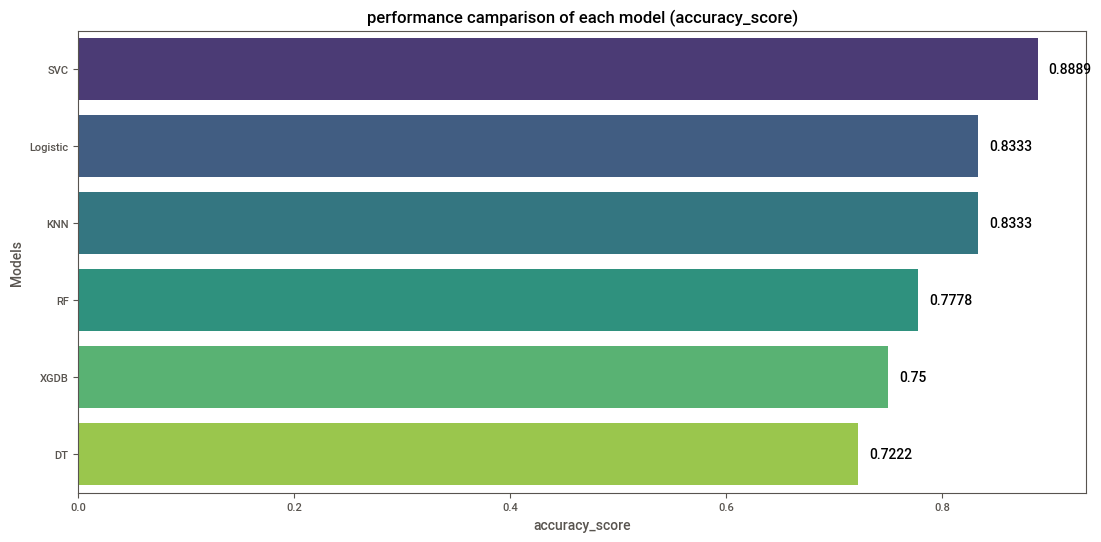

In [1556]:
data = pd.DataFrame({
    'Models': ['Logistic', 'SVC', 'KNN', 'DT', 'RF','XGDB'],
    'accuracy_score': [log_accuracy,svc_accuracy,knn_accuracy,Tree_accuracy,R_accuracy,XGB_accuracy]
})

# Sort the DataFrame by the values in descending order
data_sorted = data.sort_values('accuracy_score', ascending=False)
plt.figure(figsize=(13, 6))
ax=sns.barplot(x='accuracy_score', y='Models', data=data_sorted, palette='viridis')
plt.xlabel('accuracy_score')
plt.ylabel('Models')
plt.title('performance camparison of each model (accuracy_score)')
# Add value annotations to the bars
for i, value in enumerate(data_sorted['accuracy_score']):
    ax.text(value + 0.01, i, str(round(value,4)), va='center')
plt.show()

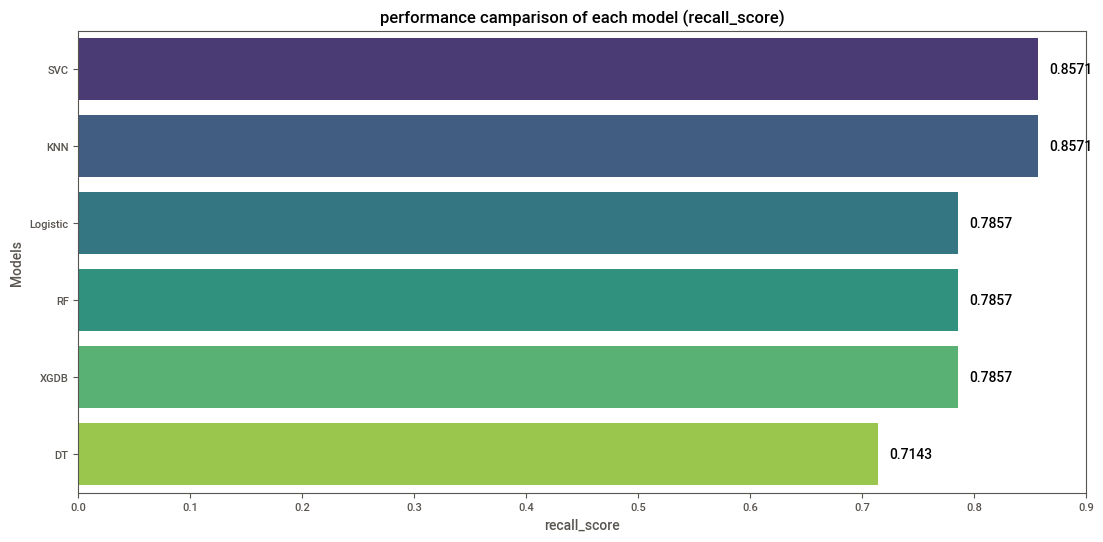

In [1559]:
data = pd.DataFrame({
    'Models': ['Logistic', 'SVC', 'KNN', 'DT', 'RF','XGDB'],
    'recall_score': [log_recall,svc_recall,knn_recall,Tree_recall,R_recall,XGB_recall]
})
data_sorted = data.sort_values('recall_score', ascending=False)
plt.figure(figsize=(13, 6))
ax=sns.barplot(x='recall_score', y='Models', data=data_sorted, palette='viridis')
plt.xlabel('recall_score')
plt.ylabel('Models')
plt.title('performance camparison of each model (recall_score)')
for i, value in enumerate(data_sorted['recall_score']):
    ax.text(value + 0.01, i, str(round(value,4)), va='center')
plt.show()

### Best Model for production (SVC)
- The Support Vector Classification (SVC) model did really well in our testing. 
- It correctly identified 85.71% of cases with heart disease, which is important in a medical context.
- It also had a good overall accuracy of 88.89%. 
- These results suggest that the SVC model could be a strong choice for use in real-world situations.
- So,the SVC model's balanced combination of high accuracy and recall makes it the preferred option for this heart disease prediction task.

### Report on Challenges faced

1.Understanding the features in the data:
- Technique: Domain Knowledge
- Reason:
- Having a good understanding of the subject helps you make smart choices when working with data and creating models.            - This helps you create better solutions that actually matter and make a difference in solving the problem you're dealing with.

2.Data Preprocessing:
- Technique: Labelencoding 
- Reason: The categorical attributes are manually labelencoded to converts them into numerical form suitable for classification. 

2.Outliers:
- Technique: IQR
- Reason:
- Outliers can distort classification results
- techniques like Z-score or IQR (Interquartile Range) are used to detect the outliers.

3.Scaling:
- Technique: StandardScalar
- Reason: 
- Here StandardScalar scalar is used to scale the data,
- Scaling attributes to a similar range prevents certain features from dominating the classification process, ensuring a fair representation of all attributes.

4.Test sample split:
- Technique: Train test split
- Reason: 
- Given the small dataset, it's important to make sure that both groups (people with heart disease and people without) are represented fairly in the test group. 
- If this isn't done properly, it could cause the accuracy and recall scores to decrease. 
- So, it's crucial to balance the test group to have similar numbers of both types of cases (heart disease present and heart disease absent) when splitting the data. 
- This helps the model perform better and makes the results more accurate.

5.Determining Optimal Classification Algorithm:
- Technique: Comparison and Evaluation
- Reason: Trying multiple Classification algorithms (like KMeans,Logistic, SVC,Decision Tree,RandomForest andXGDBoost) and evaluating their performance using metrics like accuracy score and recall score helps identify the best algorithm for the heart disease dataset.


By employing these techniques, the challenges faced in the heart disease dataset are effectively addressed, leading to meaningful classification results.